# RPGRIP1 and Associated Syndrome


Variants in [RPGRIP1](https://omim.org/entry/605446) are associated with [cone-rod dystrophy-13 (CORD13)](https://omim.org/entry/608194) and
[Leber congenital amaurosis 6](https://omim.org/entry/613826). Both conditions follow an autosomal recessive
mode of inheritance.

Data in this cohort are dervied from [Beryozkin A, et al. (2021) Retinal Degeneration Associated With RPGRIP1: A Review of Natural History, Mutation Spectrum, and Genotype-Phenotype Correlation in 228 Patients. Front Cell Dev Biol](https://pubmed.ncbi.nlm.nih.gov/34722527/)




In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.6.dev0


## RPGRIP1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for RPGRIP1.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'RPGRIP1'
mane_tx_id = 'NM_020366.4'
mane_protein_id = 'NP_065099.3' # X-linked retinitis pigmentosa GTPase regulator-interacting protein 1 isoform 1
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets


phenopacket_registry = configure_phenopacket_registry()
cohort_name = "RPGRIP1"
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 100/100 [00:02<00:00, 44.66 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
75,Nystagmus
49,Abnormal electroretinogram
43,Reduced visual acuity
40,Hypermetropia
39,Very low visual acuity
35,Eye poking
33,Retinal pigment epithelial mottling
30,Attenuation of retinal blood vessels
19,Retinal degeneration
17,Photophobia


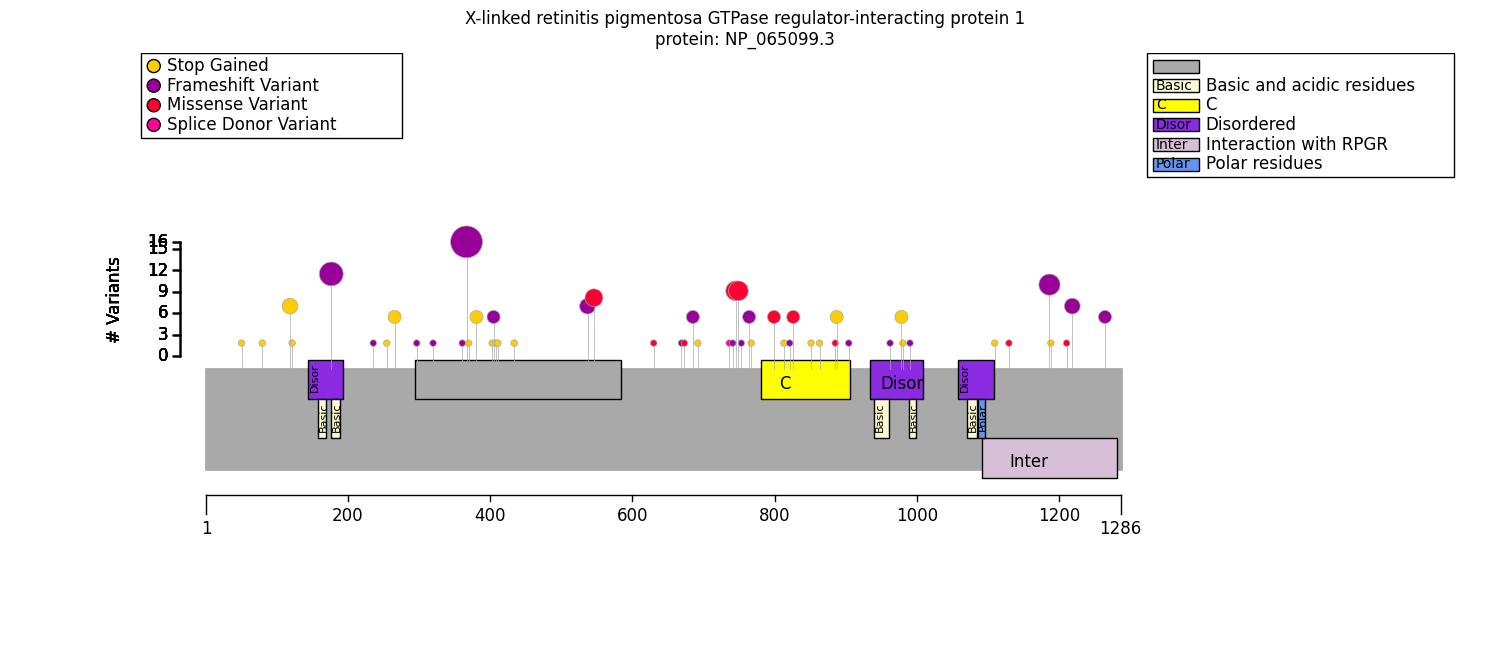

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

rpgrip1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
rpgrip1_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
8,Disordered,Region,145 - 193,p.Glu179SerfsTer11
0,Basic and acidic residues,Compositional bias,160 - 169,
8,Basic and acidic residues,Compositional bias,178 - 189,p.Glu179SerfsTer11
35,,Coiled coil,295 - 584,p.Leu323ProfsTer7; p.Glu404Ter; p.Glu383AlafsTer19; p.Lys435Ter; p.Gln412Ter; p.Leu382Ter; p.Glu539GlnfsTer2; p.Glu299SerfsTer21; p.Arg363LeufsTer11; p.Arg371Ter; p.Leu406TyrfsTer36; p.Gln409Ter; p.Ala547Ser; p.Glu370AsnfsTer5
12,C2,Domain,782 - 906,p.Leu886Phe; p.Arg888Ter; p.Tyr864Ter; p.Arg827Leu; p.Arg852Ter; p.Arg814Ter; p.Ala824IlefsTer11; p.Asn907Ter; p.Glu800Lys
5,Disordered,Region,935 - 1008,p.Ser964ProfsTer37; p.Arg981Ter; p.Gln979Ter; p.Arg992GlufsTer9
0,Basic and acidic residues,Compositional bias,941 - 960,
1,Basic and acidic residues,Compositional bias,989 - 998,p.Arg992GlufsTer9
0,Disordered,Region,1059 - 1108,
0,Basic and acidic residues,Compositional bias,1071 - 1084,


In [7]:
from gpsea.view import CohortVariantViewer
cvv = CohortVariantViewer(tx_id=mane_tx_id)
cvv.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
16,14_21312457_21312458_GA_G,c.1107del (p.Glu370AsnfsTer5),10,frameshift
8,14_21302530_21302531_AG_A,c.535del (p.Glu179SerfsTer11),5,frameshift
6,14_21345139_21345146_CAAGGCCG_C,c.3565_3571del (p.Arg1189GlyfsTer7),23,frameshift
5,14_21325265_21325265_A_G,c.2249A>G (p.Tyr750Cys),16,missense
5,14_21325252_21325252_G_A,c.2236G>A (p.Gly746Arg),16,missense
4,14_21321881_21321881_G_T,c.1639G>T (p.Ala547Ser),14,missense
3,14_21321855_21321865_AGGAACTGGAG_A,c.1615_1624del (p.Glu539GlnfsTer2),14,"frameshift, splice region"
3,14_21348210_21348214_AAAAG_A,c.3663_3666del (p.Lys1221AsnfsTer23),24,frameshift
3,14_21326544_21327883_--1340bp--_A,c.2710+374_2895+78del (-),18,"splice acceptor, splice donor, splice donor 5th base, coding sequence, intronic"
3,14_21301105_21301105_C_T,c.358C>T (p.Gln120Ter),4,stop gained


# Genotype Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import biallelic_classifier


del1107 = variant_key("14_21312457_21312458_GA_G")  # c.1107del; p.Glu370AsnfsTer5	
del1107_clf = biallelic_classifier(
    a_predicate=del1107,
    b_predicate=~del1107,
    a_label="1107del",
    b_label="other",
    partitions = ({0,1}, {2,})
)
del1107_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=del1107_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(del1107_result)

Reason,Count
Skipping term because one genotype had zero observations,1
"Skipping ""general"" level terms",24
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),72


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=del1107_result)

Allele group,1107del/1107del OR 1107del/other,other/other,Corrected p values,p values
Eye poking [HP:0001483],16/16 (100%),19/41 (46%),0.002076,0.000130
Very low visual acuity [HP:0032122],11/11 (100%),28/44 (64%),0.183424,0.022928
Photophobia [HP:0000613],0/5 (0%),17/37 (46%),0.371899,0.069731
Hypermetropia [HP:0000540],16/16 (100%),24/27 (89%),0.795761,0.282392
Retinal pigment epithelial mottling [HP:0007814],11/13 (85%),22/33 (67%),0.795761,0.293313
Attenuation of retinal blood vessels [HP:0007843],5/5 (100%),25/37 (68%),0.795761,0.298410
Nystagmus [HP:0000639],11/11 (100%),64/71 (90%),1.000000,0.585610
Abnormal involuntary eye movements [HP:0012547],11/11 (100%),64/64 (100%),1.000000,1.000000
Abnormality of retinal pigmentation [HP:0007703],13/13 (100%),30/30 (100%),1.000000,1.000000
Abnormal retinal morphology [HP:0000479],14/14 (100%),66/66 (100%),1.000000,1.000000


In [11]:
from gpsea.analysis.predicate import variant_effect, anyof

is_frameshift = variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=mane_tx_id)
is_nonsense = variant_effect(VariantEffect.STOP_GAINED,  tx_id=mane_tx_id)
ablation = variant_effect(VariantEffect.TRANSCRIPT_ABLATION,  tx_id=mane_tx_id)
null_var = anyof((is_frameshift, is_nonsense, ablation))

null_var_clf = biallelic_classifier(
    a_predicate=null_var,
    b_predicate=~null_var,
    a_label="frameshift",
    b_label="other",
    partitions = ({0,}, {1, 2,})
)

null_var_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=null_var_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=null_var_result)

Allele group,frameshift/frameshift,frameshift/other OR other/other,Corrected p values,p values
Eye poking [HP:0001483],29/40 (72%),6/17 (35%),0.271145,0.015950
Photophobia [HP:0000613],7/24 (29%),10/18 (56%),0.895922,0.116888
Hypermetropia [HP:0000540],30/31 (97%),10/12 (83%),0.895922,0.183616
Very low visual acuity [HP:0032122],28/36 (78%),11/19 (58%),0.895922,0.210805
Nystagmus [HP:0000639],45/48 (94%),30/34 (88%),1.000000,0.441056
Attenuation of retinal blood vessels [HP:0007843],18/26 (69%),12/16 (75%),1.000000,0.740166
Retinal pigment epithelial mottling [HP:0007814],24/33 (73%),9/13 (69%),1.000000,1.000000
Abnormality of retinal pigmentation [HP:0007703],30/30 (100%),13/13 (100%),1.000000,1.000000
Abnormal electroretinogram [HP:0000512],30/30 (100%),19/19 (100%),1.000000,1.000000
Sensory behavioral abnormality [HP:5200046],35/35 (100%),16/16 (100%),1.000000,1.000000


In [12]:
is_missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = biallelic_classifier(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label="missense",
    b_label="other",
    partitions = ({0,}, {1, 2})
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,missense/missense,missense/other OR other/other,Corrected p values,p values
Nystagmus [HP:0000639],9/12 (75%),66/70 (94%),1.0,0.060707
Macular atrophy [HP:0007401],3/5 (60%),9/35 (26%),1.0,0.148649
Photophobia [HP:0000613],8/14 (57%),9/28 (32%),1.0,0.183587
Retinal pigment epithelial mottling [HP:0007814],5/5 (100%),28/41 (68%),1.0,0.301459
Eye poking [HP:0001483],3/7 (43%),32/50 (64%),1.0,0.411374
Very low visual acuity [HP:0032122],5/9 (56%),34/46 (74%),1.0,0.422374
Abnormal electroretinogram [HP:0000512],10/10 (100%),39/39 (100%),1.0,1.000000
Sensory behavioral abnormality [HP:5200046],11/11 (100%),40/40 (100%),1.0,1.000000
Atypical behavior [HP:0000708],11/11 (100%),40/40 (100%),1.0,1.000000
Abnormal retinal morphology [HP:0000479],17/17 (100%),63/63 (100%),1.0,1.000000


In [13]:
from gpsea.analysis.clf import sex_classifier
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Attenuation of retinal blood vessels [HP:0007843],14/17 (82%),15/24 (62%),1.0,0.296352
Very low visual acuity [HP:0032122],20/25 (80%),19/29 (66%),1.0,0.361592
Nystagmus [HP:0000639],36/38 (95%),36/41 (88%),1.0,0.433832
Macular atrophy [HP:0007401],6/16 (38%),6/24 (25%),1.0,0.489813
Hypermetropia [HP:0000540],23/25 (92%),17/17 (100%),1.0,0.506388
Retinal pigment epithelial mottling [HP:0007814],20/27 (74%),12/18 (67%),1.0,0.739452
Eye poking [HP:0001483],20/31 (65%),15/25 (60%),1.0,0.785927
Abnormal electroretinogram [HP:0000512],21/21 (100%),22/22 (100%),1.0,1.000000
Abnormality of retinal pigmentation [HP:0007703],24/24 (100%),18/18 (100%),1.0,1.000000
Sensory behavioral abnormality [HP:5200046],25/25 (100%),22/22 (100%),1.0,1.000000


# LCA6 and CRD13

Both Leber congenital amaurosis 6 (OMIM:613826) and Cone-rod dystrophy 13 (OMIM:608194	) are caused by pathogenic variation in RPGRIP1. The following code searches for phenotypic features that are significantly different between both diseases. We find that Very low visual acuity and Nystagmus are significantly more common in LCA6.

In [14]:
from gpsea.analysis.clf import diagnosis_classifier

dx_predicate = diagnosis_classifier(
    diagnoses=('OMIM:613826', 'OMIM:608194'),
    labels=('LCA6', 'CRD13'),
)

dx_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=dx_predicate,
    pheno_clfs=pheno_clfs,
)
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, dx_result)

Diagnosis,OMIM:613826,OMIM:608194,Corrected p values,p values
Very low visual acuity [HP:0032122],35/39 (90%),4/16 (25%),0.000078,0.000005
Nystagmus [HP:0000639],64/66 (97%),11/16 (69%),0.019549,0.002607
Macular atrophy [HP:0007401],6/29 (21%),6/11 (55%),0.249859,0.056323
Attenuation of retinal blood vessels [HP:0007843],23/28 (82%),7/14 (50%),0.249859,0.066629
Photophobia [HP:0000613],8/23 (35%),9/19 (47%),1.000000,0.531096
Abnormal electroretinogram [HP:0000512],34/34 (100%),15/15 (100%),1.000000,1.000000
Abnormality of retinal pigmentation [HP:0007703],36/36 (100%),7/7 (100%),1.000000,1.000000
Hypermetropia [HP:0000540],36/39 (92%),4/4 (100%),1.000000,1.000000
Sensory behavioral abnormality [HP:5200046],42/42 (100%),9/9 (100%),1.000000,1.000000
Atypical behavior [HP:0000708],42/42 (100%),9/9 (100%),1.000000,1.000000


# Summary

In [15]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=del1107_result,
    ),
  GPAnalysisResultSummary.from_multi(
        result=null_var_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=dx_result,
    ),
)
caption = """It was reported that Patients with a double null genotype may develop 
symptoms earlier and have worse vision \\cite{PMID_38768745}. We did not observe a corresponding significant correlation in our dataset."""

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
    fet_results=fet_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption)


In [16]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [17]:
summarizer.process_latex(report=report, protein_fig=rpgrip1_fig)

Figure saved to ../../supplement/img/RPGRIP1_protein_diagram-draft.pdf
Output to ../../supplement/tex/RPGRIP1_summary_draft.tex
